# <a id='0'>Table of contents</a>
- <a href='#1'>Introduction</a>  
- <a href='#2'>Preparation</a>  
- <a href='#3'>Exploration Data Analysis</a>   
 - <a href='#31'>Check the data</a>   
 - <a href='#32'>Features visualization</a>   

- <a href='#4'>Visualize the dataset to see the separation</a>  

- <a href='#5'>Implement a Gaussian Mixture Model</a>
- <a href='#6'>Fit and evaluate the model</a>  
- <a href='#7'>Conclusion</a>  


## <a id='1'>Introduction</a>  
### Cardiotocogrpahy dataset
The original [Cardiotocography](http://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/) dataset from UCI machine learning repository consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians. This is a classification dataset, where the classes are normal, suspect, and pathologic. For outlier detection, The normal class formed the inliers, while the pathologic (outlier) class is downsampled to 176 points. The suspect class is discarded.
### My work
In this section I will have to implement a GMM from scratch to detect abnormal samples from a dataset
- Visualize the dataset to see the separation
- Implement a Gaussian Mixture Model
- Train test split (test set ratio could be 0.1 amount of data). 
- Fit the model
- Use the fitted model to detect whether a test sample is anomalous or not

## <a id='2'>Preparation</a> 

In [0]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans

In [0]:
mat = scipy.io.loadmat('cardio.mat')
X = mat['X']
y = mat['y'] 

In [9]:
print(X.shape, y.shape)

(1831, 21) (1831, 1)


In [0]:
# convert multi-dimensional point data to dataframe
data = pd.DataFrame(X)
data['label'] = y

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,label
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,0.372149,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0.0
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,0.882794,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0.0
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,2.516859,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0.0
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,1.989193,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0.0
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,0.797687,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0.0


## <a id='3'>Exploration Data Analysis</a>  

In [12]:
# check if there are any missing data
data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
label    0
dtype: int64

In [13]:
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
20       float64
label    float64
dtype: object

All of our features are float64 and there are no missing data.

In [14]:
# Get some information about these numeric features
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,label
count,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1831.000000
mean,1.144603e-15,9.408094e-16,8.313636e-16,-1.566682e-15,-2.365970e-15,-8.702229e-16,-4.825923e-15,-6.424862e-16,-2.267256e-15,-1.048072e-15,2.554665e-15,1.905448e-16,1.319413e-16,8.289989e-16,5.525649e-16,1.119925e-16,-3.283980e-16,-3.771484e-16,4.717387e-16,1.244226e-16,-1.173526e-15,0.096122
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.294839
min,-2.746331e+00,-9.199884e-01,-2.036405e-01,-1.635871e+00,-6.835985e-01,-6.140064e-02,-2.782949e-01,-1.949572e+00,-1.441358e+00,-4.204873e-01,-1.398088e+00,-1.876524e+00,-1.439841e+00,-2.325379e+00,-1.441408e+00,-4.882789e-01,-4.567897e+00,-3.829316e+00,-4.113439e+00,-6.905897e-01,-2.126605e+00,0.000000
25%,-7.358069e-01,-9.199884e-01,-2.036405e-01,-7.425390e-01,-6.835985e-01,-6.140064e-02,-2.782949e-01,-8.727134e-01,-7.464856e-01,-4.204873e-01,-6.831845e-01,-8.704229e-01,-9.052873e-01,-6.753367e-01,-7.533948e-01,-4.882789e-01,-5.401537e-01,-5.730636e-01,-6.650764e-01,-5.903887e-01,-4.932940e-01,0.000000
50%,4.912315e-03,-2.872966e-01,-2.036405e-01,2.691593e-02,-6.835985e-01,-6.140064e-02,-2.782949e-01,-3.515685e-02,-1.674248e-01,-4.204873e-01,-1.214746e-01,-2.317947e-02,-5.000071e-02,-7.032128e-02,-6.538189e-02,-4.882789e-01,8.864667e-04,6.541726e-02,2.459619e-02,-3.899867e-01,-4.932940e-01,0.000000
75%,6.398145e-01,6.604231e-01,-1.605488e-01,7.200708e-01,5.243316e-01,-6.140064e-02,-2.782949e-01,8.023997e-01,4.116360e-01,-1.715262e-01,4.912997e-01,7.446349e-01,8.765597e-01,5.896955e-01,6.226310e-01,-4.882789e-01,6.621578e-01,7.038981e-01,7.142687e-01,1.778189e-01,1.140018e+00,0.000000
max,2.967789e+00,3.956212e+00,9.929345e+00,3.584122e+00,4.316910e+00,1.990039e+01,8.587322e+00,2.537338e+00,6.433868e+00,5.243379e+00,7.231818e+00,2.809791e+00,2.444585e+00,4.054783e+00,4.750709e+00,1.402534e+01,3.066781e+00,3.130125e+00,3.403992e+00,8.294100e+00,1.140018e+00,1.000000


### Some observations
- standard deviation is almost equal 1 for all features     (1)
- mean value is almost equal 0 for all features             (2)
- mean value of label is 0.096, which mean there are 9,6% label are 1

Because of (1) and (2) when visualizing features we will consider these figures over the rows( not the columns) 


### <a id='32'>Features visualization</a> 
 
We represent with different colors the distribution for values with target value 0 and 1.

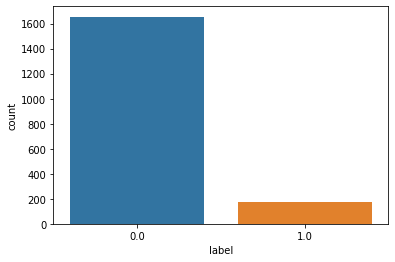

In [15]:
sns.countplot(data['label'])

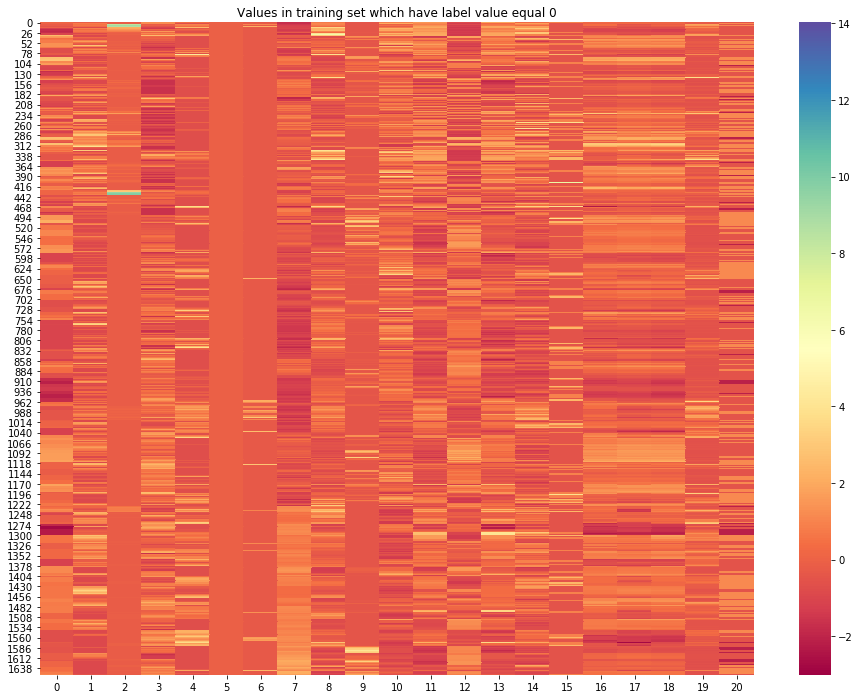

In [16]:
label0 = data.loc[data['label'] == 0, data.columns.values[:-1]]
label1 = data.loc[data['label'] == 1, data.columns.values[:-1]]

plt.subplots(figsize=(16, 12))
plt.title("Values in training set which have label value equal 0")
sns.heatmap(label0, cmap="Spectral")
plt.show()

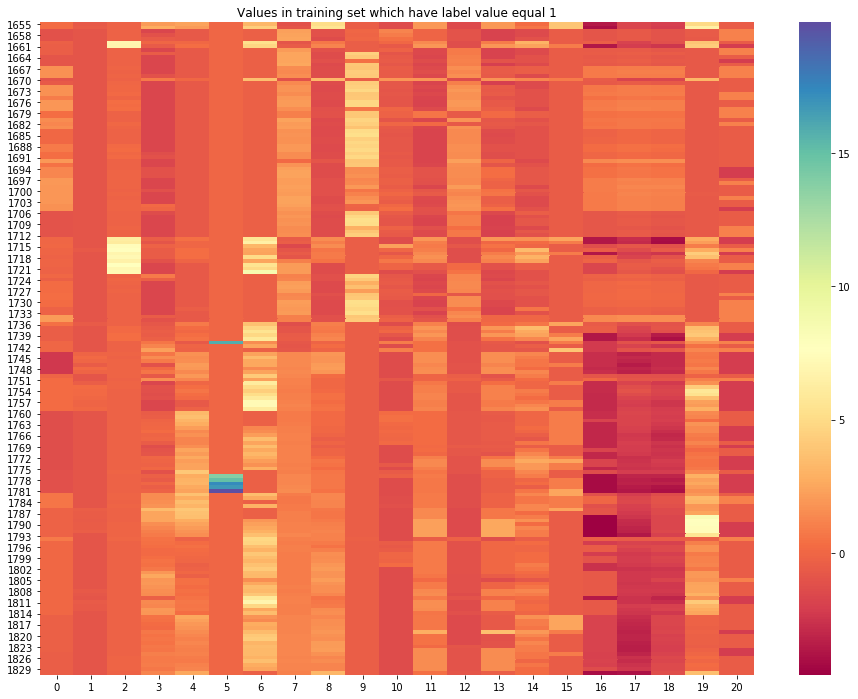

In [17]:
plt.subplots(figsize=(16,12))
plt.title("Values in training set which have label value equal 1")
sns.heatmap(label1, cmap='Spectral')
plt.show()

<Figure size 432x288 with 0 Axes>

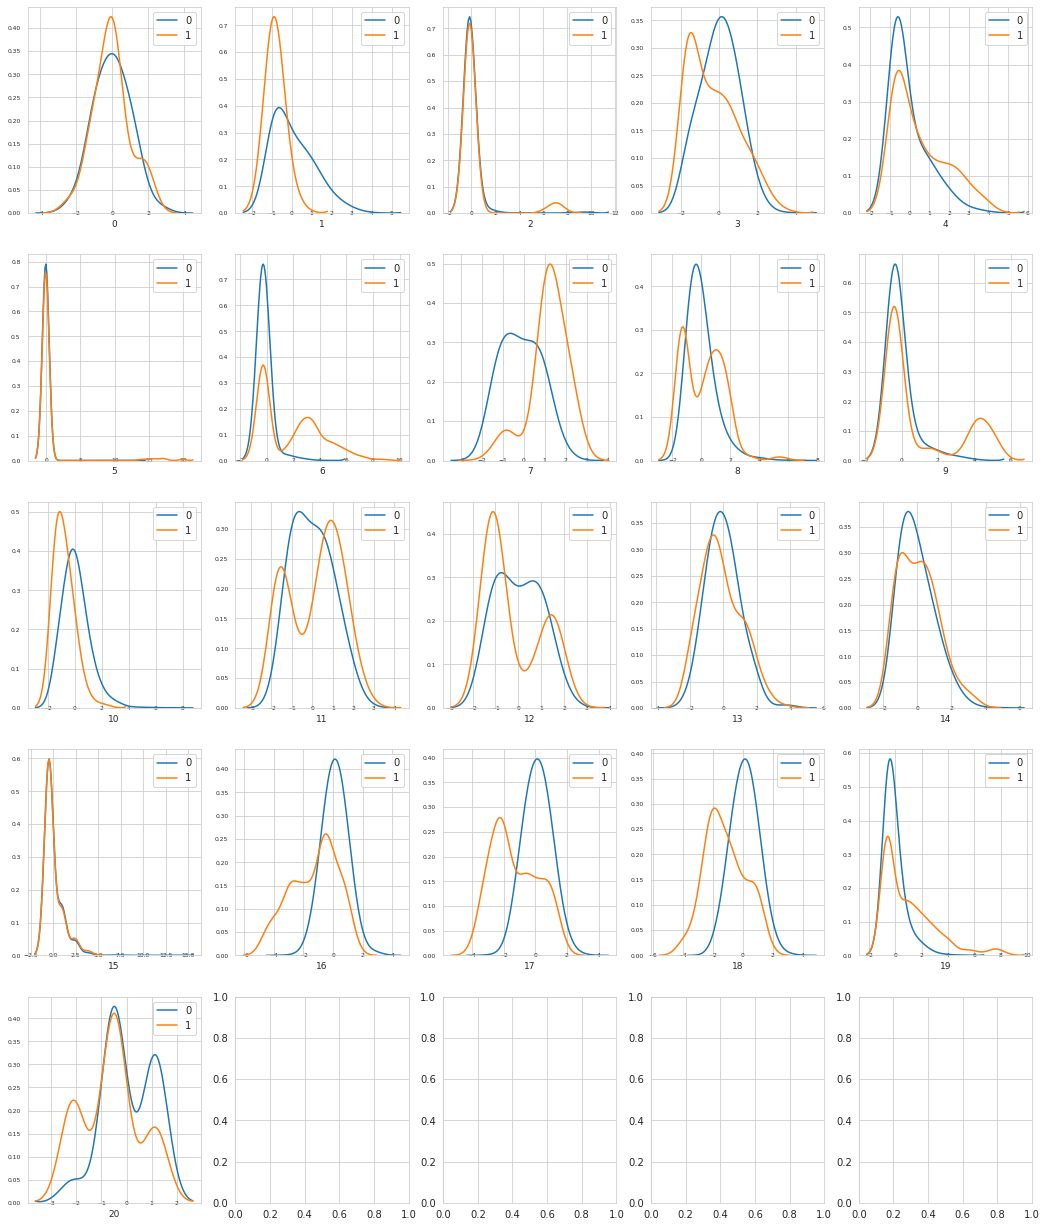

In [18]:
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,5,figsize=(18,22))
features = data.columns.drop('label')
for i, feature in enumerate(features):
    plt.subplot(5,5,i+1)
    sns.kdeplot(data.loc[data['label'] == 0][feature].values, bw=0.5,label='0')
    sns.kdeplot(data.loc[data['label'] == 1][feature].values, bw=0.5,label='1')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show()    


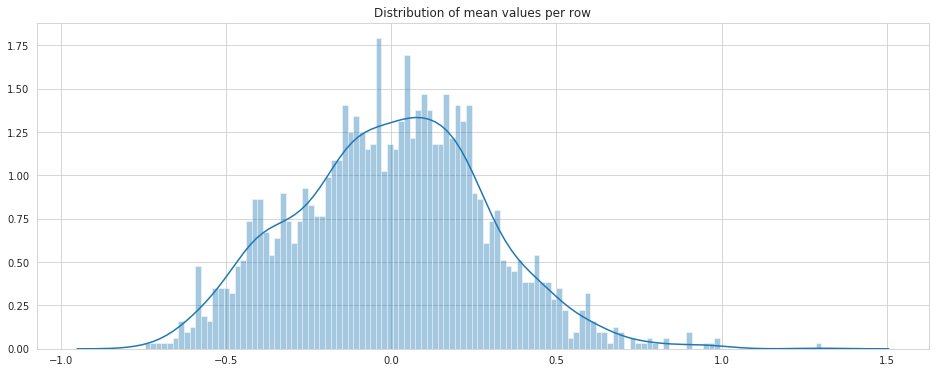

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row")
sns.distplot(data[features].mean(axis=1), kde=True,bins=120)
plt.show()

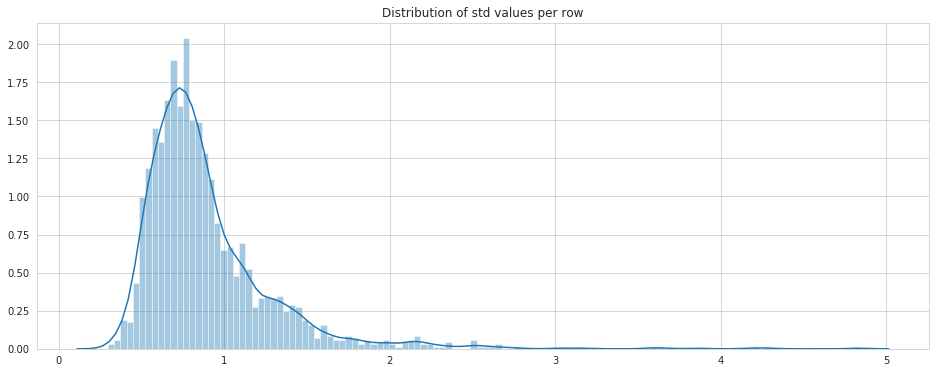

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row")
sns.distplot(data[features].std(axis=1), kde=True,bins=120)
plt.show()

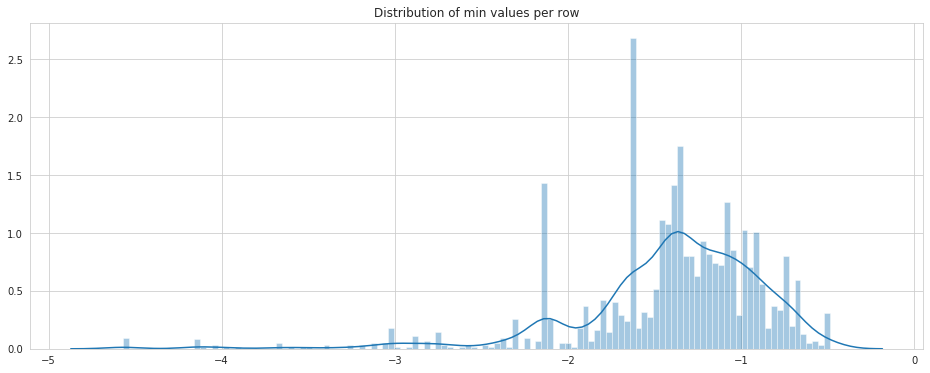

In [21]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row")
sns.distplot(data[features].min(axis=1), kde=True,bins=120, label='train')
plt.show()

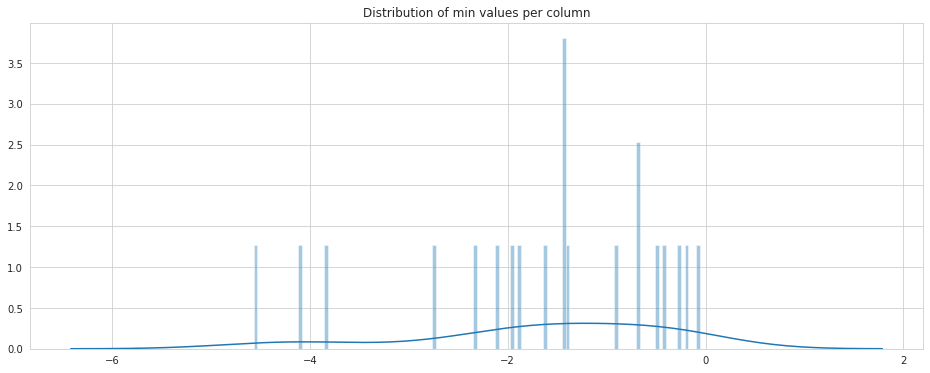

In [22]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column")
sns.distplot(data[features].min(axis=0), kde=True,bins=120)
plt.show()

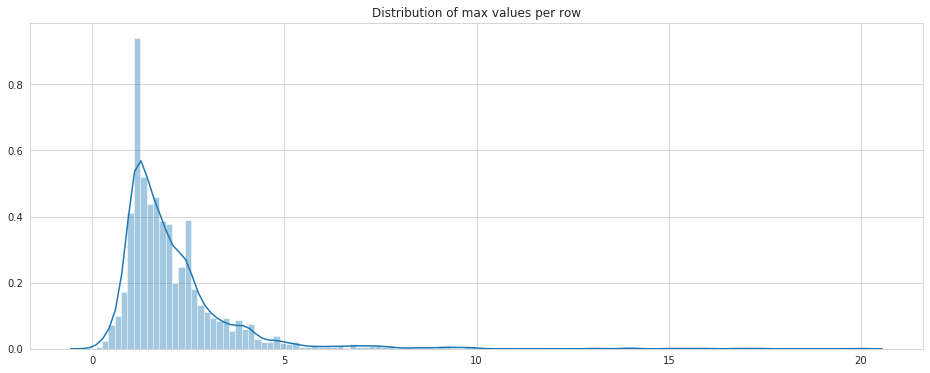

In [23]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per row")
sns.distplot(data[features].max(axis=1), kde=True,bins=120)
plt.show()

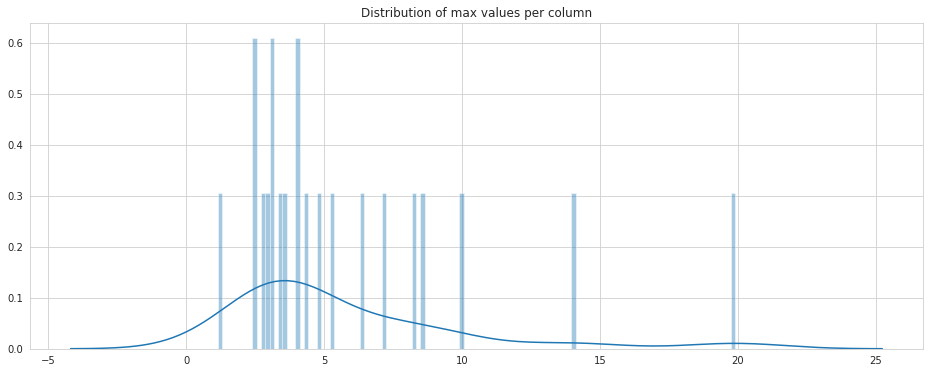

In [24]:
plt.figure(figsize=(16,6))
plt.title("Distribution of max values per column")
sns.distplot(data[features].max(axis=0), kde=True,bins=120)
plt.show()

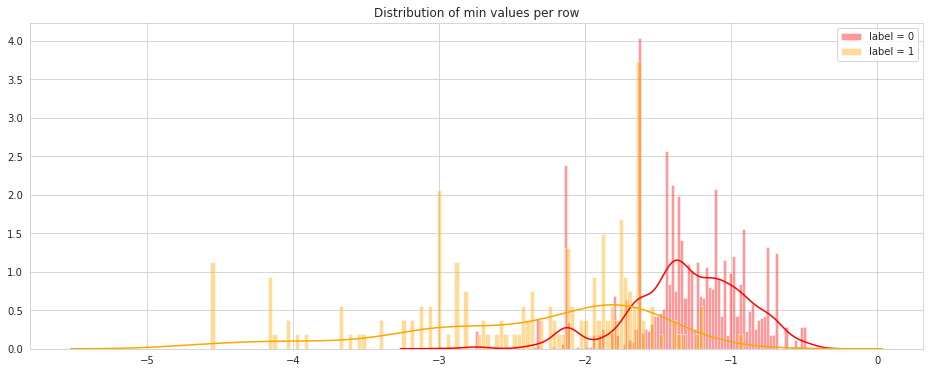

In [25]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row")
sns.distplot(label0[features].min(axis=1),color="red", kde=True,bins=120, label='label = 0')
sns.distplot(label1[features].min(axis=1),color="orange", kde=True,bins=120, label='label = 1')
plt.legend()
plt.show()

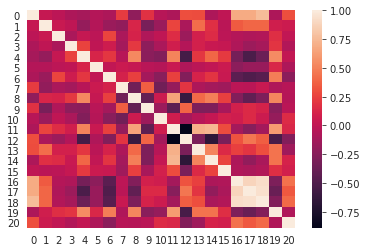

In [27]:
corr = data[features].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## <a id=''>Visualize the dataset to see the separation</a>  


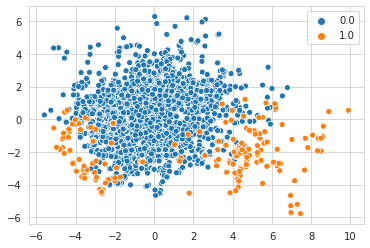

In [28]:
pca_2dims = PCA(n_components=2)
X_2dims = pca_2dims.fit_transform(X)
sns.scatterplot(x=X_2dims[:,0], y=X_2dims[:,1], hue=y.reshape(-1))

## <a id='5'>Implement a Gaussian Mixture Model</a> 


In [29]:
data_2dims=pd.DataFrame(X_2dims)
data_2dims['label'] = y
data_2dims.head()

,0,1,label
0,1.516310,2.288889,0.0
1,1.558575,1.985634,0.0
2,1.717406,2.111174,0.0
3,1.277277,2.181252,0.0
4,-0.004880,0.398949,0.0


In [0]:
class GMM:
    def __init__(self, C, n_runs):
        self.C = C # number of Guassians/clusters
        self.n_runs = n_runs
        
    def get_params(self):
        return (self.mu, self.pi, self.sigma)
      
    def calculate_mean_covariance(self, X, prediction):

        d = X.shape[1]
        labels = np.unique(prediction)
        self.initial_means = np.zeros((self.C, d))
        self.initial_cov = np.zeros((self.C, d, d))
        self.initial_pi = np.zeros(self.C)
        
        counter=0
        for label in labels:
            ids = np.where(prediction == label) # returns indices
            self.initial_pi[counter] = len(ids[0]) / X.shape[0]
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0)
            de_meaned = X[ids] - self.initial_means[counter,:]
            Nk = X[ids].shape[0] # number of data points in current gaussian
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk
            counter+=1
        assert np.sum(self.initial_pi) == 1    
            
        return (self.initial_means, self.initial_cov, self.initial_pi)
            
    def _initialise_parameters(self, X):

        n_clusters = self.C
        #kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'auto')
        #fitted = kmeans.fit(X)
        #prediction = kmeans.predict(X)
        #self._initial_means, self._initial_cov, self._initial_pi = self.calculate_mean_covariance(X, prediction)
        
        self._initial_means = np.zeros((self.C, self.C))
        self._initial_pi = np.ones((self.C)) / self.C
        self._initial_cov = np.identity(self.C)       
        return (self._initial_means, self._initial_cov, self._initial_pi)
            
    def _e_step(self, X, pi, mu, sigma):
        N = X.shape[0] 
        self.gamma = np.zeros((N, self.C))

        const_c = np.zeros(self.C)
        self.mu = self.mu if self._initial_means is None else self._initial_means
        self.pi = self.pi if self._initial_pi is None else self._initial_pi
        self.sigma = self.sigma if self._initial_cov is None else self._initial_cov

        for c in range(self.C):
            # Posterior Distribution using Bayes Rule
            self.gamma[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])

        # normalize across columns to make a valid probability
        gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
        self.gamma /= gamma_norm

        return self.gamma
    
    def _m_step(self, X, gamma):
        N = X.shape[0] # number of objects
        C = self.gamma.shape[1] # number of clusters
        d = X.shape[1] # dimension of each object

        # responsibilities for each gaussian
        self.pi = np.mean(self.gamma, axis = 0)

        self.mu = np.dot(self.gamma.T, X) / np.sum(self.gamma, axis = 0)[:,np.newaxis]

        for c in range(C):
            x = X - self.mu[c, :] # (N x d)
            
            gamma_diag = np.diag(self.gamma[:,c])
            x_mu = np.matrix(x)
            gamma_diag = np.matrix(gamma_diag)

            sigma_c = x.T * gamma_diag * x
            self.sigma[c,:,:]=(sigma_c) / np.sum(self.gamma, axis = 0)[:,np.newaxis][c]

        return self.pi, self.mu, self.sigma
    
    def _compute_loss_function(self, X, pi, mu, sigma):

        N = X.shape[0]
        C = self.gamma.shape[1]
        self.loss = np.zeros((N, C))

        for c in range(C):
            dist = mvn(self.mu[c], self.sigma[c],allow_singular=True)
            self.loss[:,c] = self.gamma[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.gamma[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss

    def fit(self, X):

        d = X.shape[1]
        self.mu, self.sigma, self.pi =  self._initialise_parameters(X)
        
        try:
            for run in range(self.n_runs):  
                self.gamma  = self._e_step(X, self.mu, self.pi, self.sigma)
                self.pi, self.mu, self.sigma = self._m_step(X, self.gamma)
                loss = self._compute_loss_function(X, self.pi, self.mu, self.sigma)
                
                if run % 10 == 0:
                    print("Iteration: %d Loss: %0.6f" %(run, loss))

        except Exception as e:
            print(e)

        return self
        
    def predict(self, X):

        labels = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
        labels  = labels .argmax(1)
        return labels 
    
    def predict_proba(self, X):
        post_proba = np.zeros((X.shape[0], self.C))
        
        for c in range(self.C):
            # Posterior Distribution using Bayes Rule, try and vectorise
            post_proba[:,c] = self.pi[c] * mvn.pdf(X, self.mu[c,:], self.sigma[c])
    
        return post_proba

## <a id='6'>Fit and evalute the model</a> 
GMM is fitted only on the normal samples 


In [31]:
label0 = X_2dims[y.reshape(-1)==0, :]
label1 = X_2dims[y.reshape(-1)==1, :]
print(label0.shape, label1.shape)

(1655, 2) (176, 2)


In [32]:
# Split the data which has label=0
X_train, X_valid, y_train, y_valid = train_test_split(label0, [0]*len(label0), test_size=0.1, random_state=42)
print(len(X_train), len(X_valid), len(y_train), len(y_valid))

1489 166 1489 166


In [33]:
model = GMM(1, n_runs = 50)

model.fit(X_train)

Iteration: 0 Loss: -6113.511902
Iteration: 10 Loss: -6113.511902
Iteration: 20 Loss: -6113.511902
Iteration: 30 Loss: -6113.511902
Iteration: 40 Loss: -6113.511902


In [34]:
# But evalute model on the whole dataset
label0_score = model.predict_proba(X_train)

thresholds = [label0_score.mean() - i * label0_score.std() for i in range(4)]
for threshold in thresholds:
    
    TPR = (model.predict_proba(label1) < threshold).sum()/len(label1)
    TNR = (model.predict_proba(X_valid) > threshold).sum()/len(X_valid)
    print(f'Threshold {threshold:.3f} has:')
    print(f'True positive rate: {TPR}')
    print(f'True negative rate: {TNR}')

Threshold 0.022 has:
True positive rate: 0.9886363636363636
True negative rate: 0.5120481927710844
Threshold 0.010 has:
True positive rate: 0.9034090909090909
True negative rate: 0.7710843373493976
Threshold -0.003 has:
True positive rate: 0.0
True negative rate: 1.0
Threshold -0.015 has:
True positive rate: 0.0
True negative rate: 1.0


## <a id='7'>Conclusion</a> 

This model has a extremely high TPR with threshold equal the mean-value of normal samples probability and suitable for anomaly detection problems likes in the case of [Cardiotocogrpahy pathologic detection](http://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/)